# BIKE SHARING DEMAND

The goal of this experiment is to find the demand of rental bikes on any given day at any time to help the comapany prepare for demand

**A SHORT DESCRIPTION OF THE FEATURES.**

*datetime* - hourly date + timestamp

*season* - 1 = spring, 2 = summer, 3 = fall, 4 = winter

*holiday* - whether the day is considered a holiday

*workingday* - whether the day is neither a weekend nor holiday

*weather* -

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*temp* - temperature in Celsius

*atemp* - "feels like" temperature in Celsius

*humidity* - relative humidity

*windspeed* - wind speed

*casual* - number of non-registered user rentals initiated

*registered* - number of registered user rentals initiated

*count* - number of total rentals

Here all the variables or features are numeric and the target variable that we have to predict is the *count* variable. Hence this is an example of a regression problem as the *count* variable is continuous varied.

**PREPROCESSING STEPS TAKEN**

1. No NULL values so no need of imputing or removing of NULL data.
2. Removing outliers from *windspeed* column by deleting rows with outliers in them.
3. Splitting of *datetime* feature into indivudal day, month, year and hour features to get more useful features.
4. Creating separate columns for each *season* and *weather*, by doing this the model can assign different importance or weights to each season and weather independently. This allows for more nuanced relationships between seasons and the target variable.
5. Dropping *casual* and *registered* columns as they did not provide anything to predicting the *count*



Installing the required packages

In [1]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Importing and downloading the dataset from kaggle

In [2]:
import opendatasets as od

In [3]:
od.download(
    "https://www.kaggle.com/competitions/bike-sharing-demand")

Skipping, found downloaded files in "./bike-sharing-demand" (use force=True to force download)


Importing all the necessary libraries and setting the plot style

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error,accuracy_score


In [5]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [6]:
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

Loading the dataset

In [7]:
df = pd.read_csv("/content/bike-sharing-demand/train.csv")
test_df = pd.read_csv("/content/bike-sharing-demand/test.csv")

Exploring and cleaning the dataset

In [8]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no NULL values in the dataset

## Doing exploratory plotting on the dataset

Starting with the distribution of the discrete features

In [11]:
print(df.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [12]:
df.season.value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

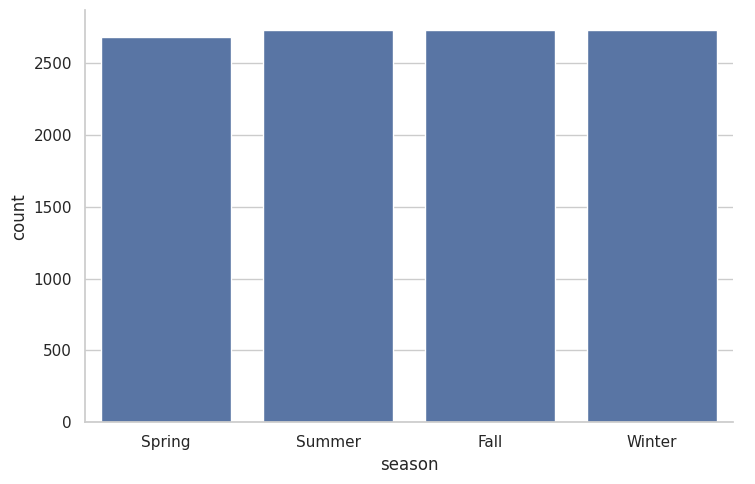

In [13]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
g = sns.catplot(x='season', data=df, kind='count', aspect=1.5)
g.set_xticklabels(season_map.values())
plt.show()

The distribution between all the seasons is uniform

holiday
0    10575
1      311
Name: count, dtype: int64


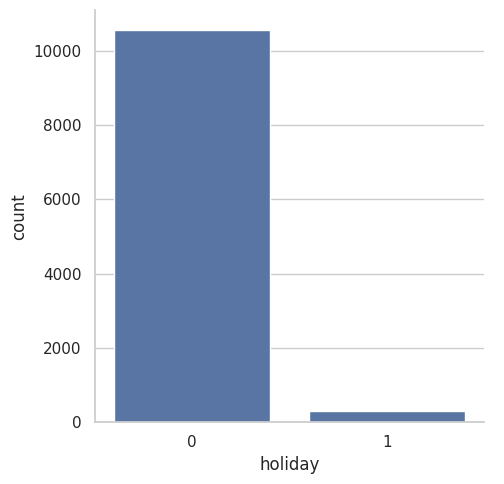

In [14]:
print(df.holiday.value_counts())
sns.catplot(x='holiday',data=df,kind='count',aspect=1)

There are alot more regular days compared to holidays. Over 30 times as many.

workingday
1    7412
0    3474
Name: count, dtype: int64


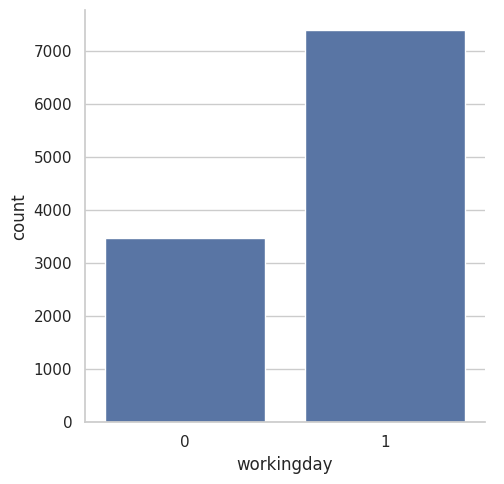

In [15]:
print(df.workingday.value_counts())
sns.catplot(x='workingday',data=df,kind='count',aspect=1)

There are alot more working days days compared to non working days. Over twice as much.

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


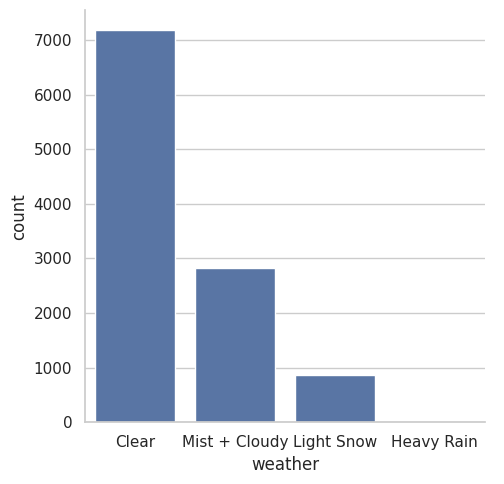

In [16]:
print(df.weather.value_counts())

weather_map = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'}

g = sns.catplot(x='weather',data=df,kind='count',aspect=1)
g.set_xticklabels(weather_map.values())
plt.show()

Now we will check the distribution of the continous variables

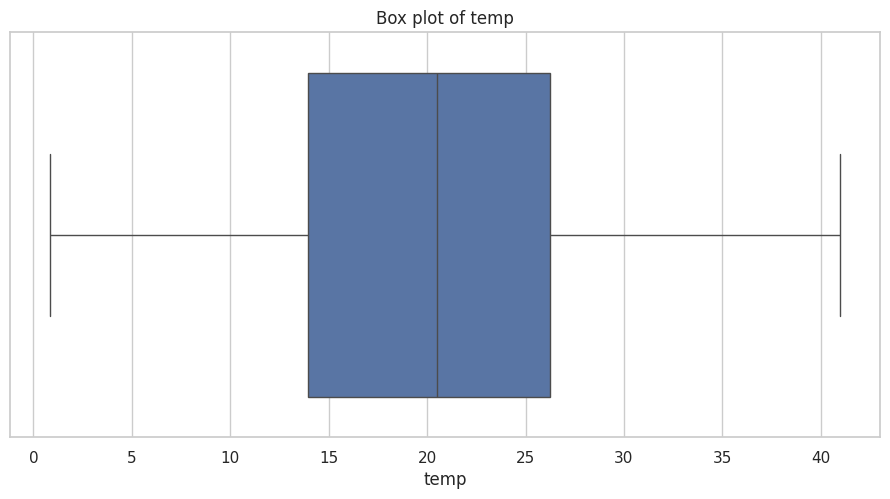

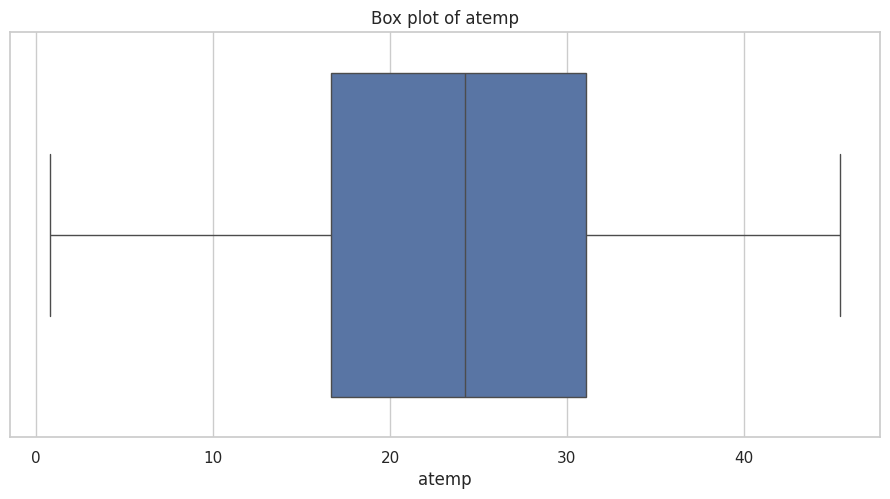

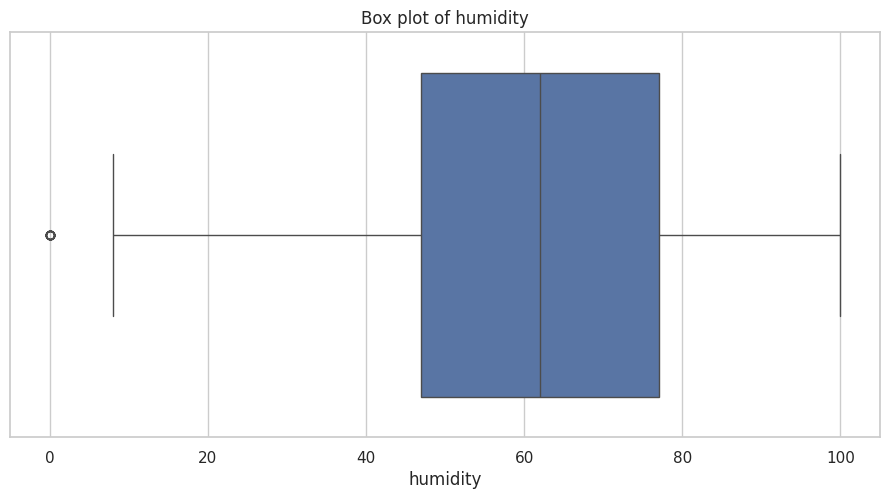

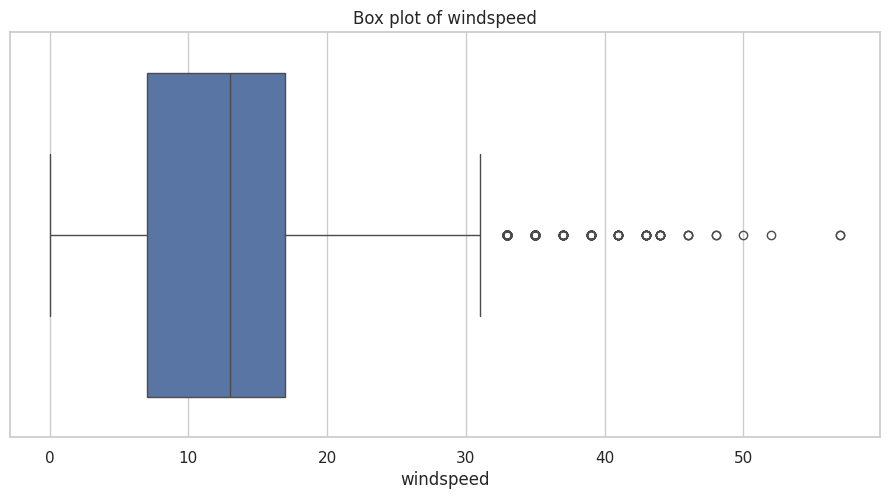

In [17]:
# Numerical features to check for outliers
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed']

# Plotting box plots
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

As we can see from the box plots the only feature with outliers is *windspeed*

In [18]:
# Remove outliers from windspeed column
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['windspeed'] >= (Q1 - 1.5 * IQR)) & (df['windspeed'] <= (Q3 + 1.5 * IQR))]
df.shape

(10659, 12)

Creating histograms to check the distribution of all the continous variables better

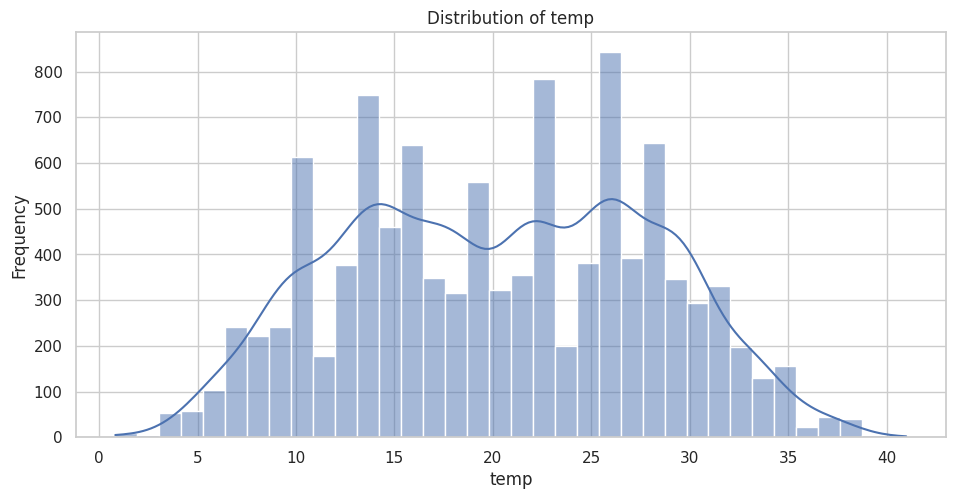

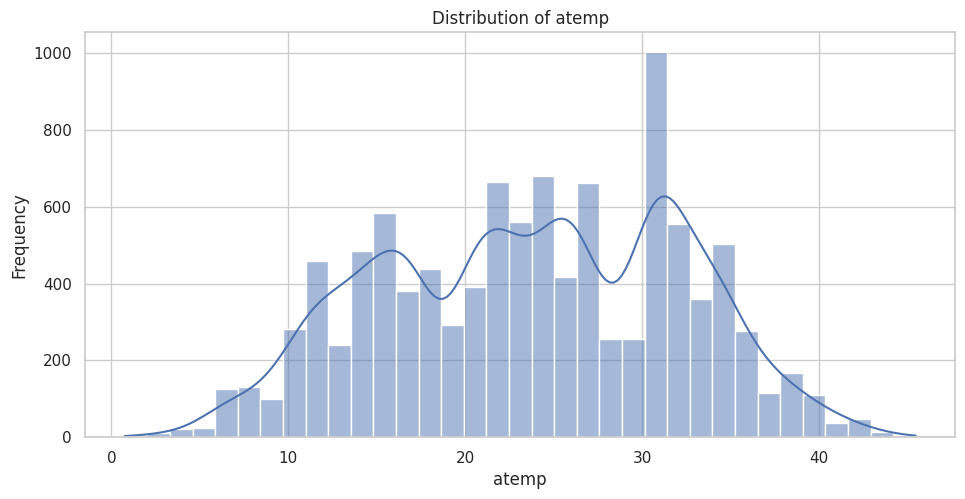

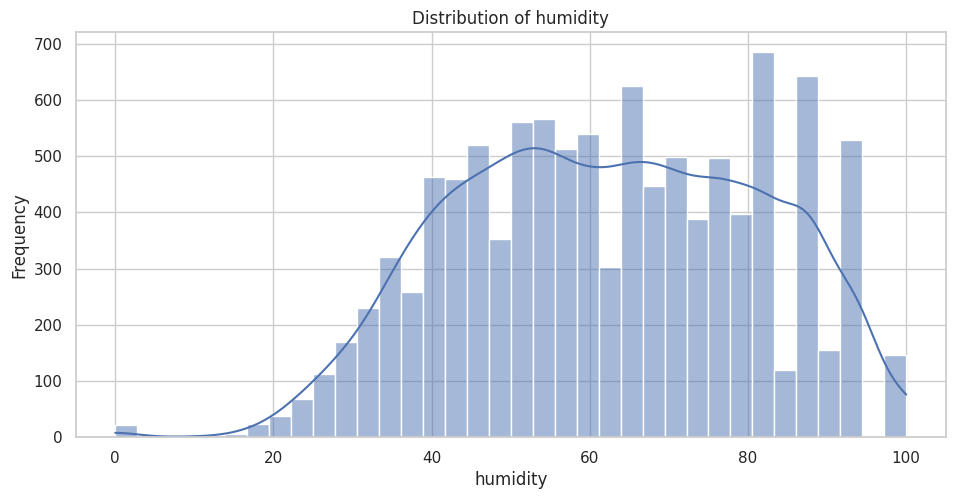

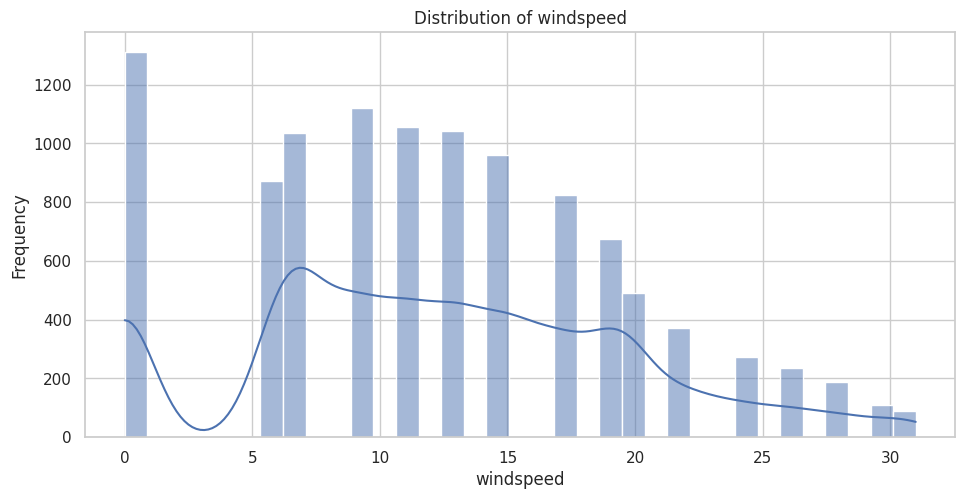

In [19]:
  # Histogram of key numerical features
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Feature Selection

<Axes: >

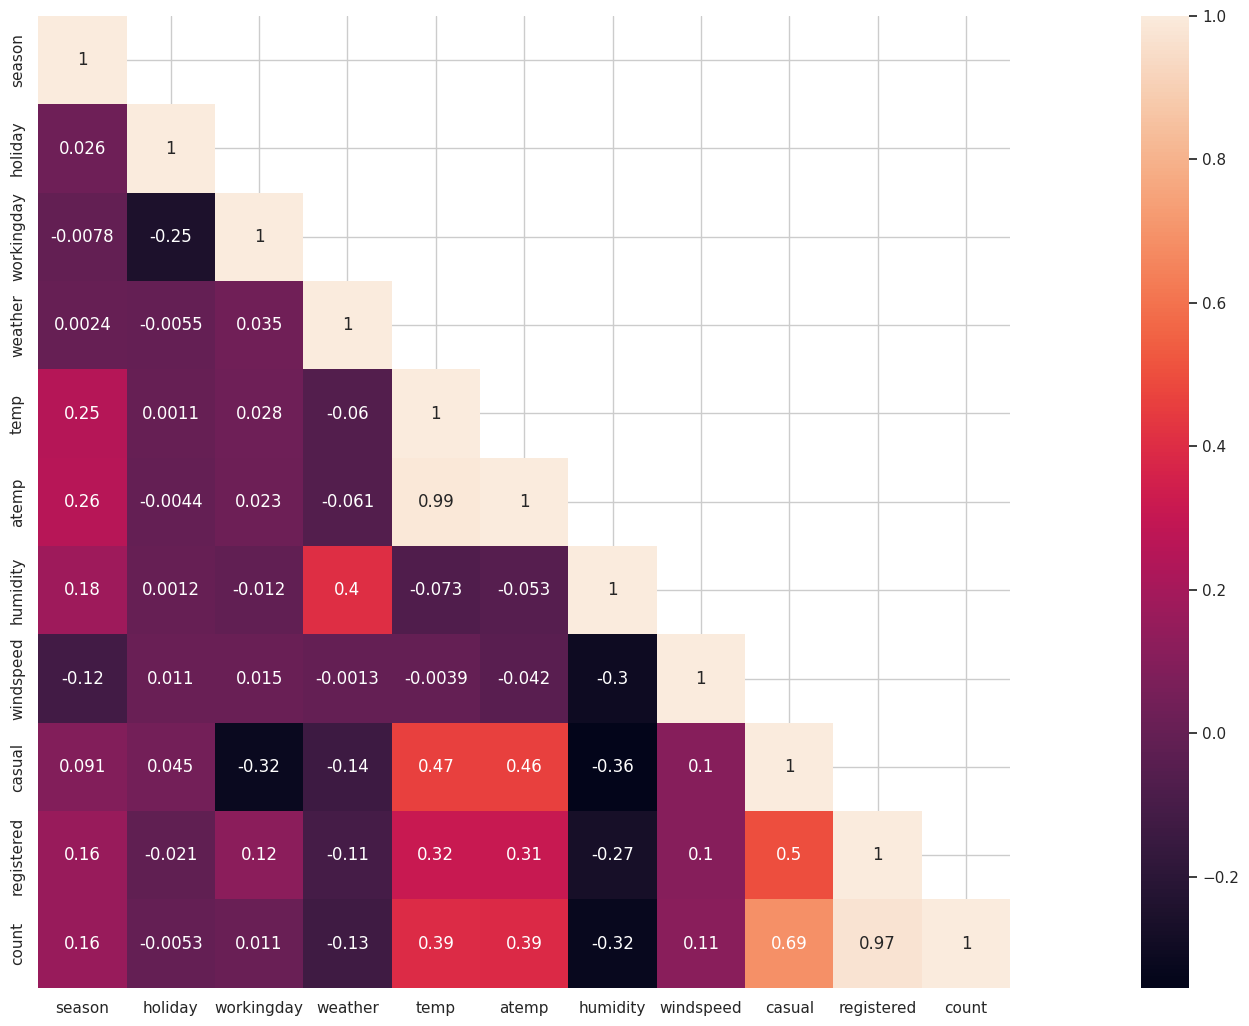

In [20]:
#corelation matrix.
cor_mat= df[:].drop(columns=['datetime']).corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

**INFERENCES FROM THE ABOVE HEATMAP**
1. self realtion i.e. of a feature to itself is equal to 1 as expected.

2. temp and atemp are highly related as expected.

3. humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.

4. casual and working day are highly inversely related as you would expect.

5. count and holiday are highly inversely related as you would expect.

6. temp(or atemp) highly effects the count.

7. weather and count are highly inversely related. This is because for our data as weather intensity increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.

8. registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

By creating separate columns for each season, the model can assign different importance or weights to each season independently. This allows for more nuanced relationships between seasons and the target variable.

In [21]:
# # seperating season as per values as it will enhance the featues.
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
print(df.head())
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
print(test_df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  season_1  season_2  \
0        81        0.0       3          13     16      True     False   
1        80        0.0       8          32     40      True     False   
2        80        0.0       5          27     32      True     False   
3        75        0.0       3          10     13      True     False   
4        75        0.0       0           1      1      True     False   

   season_3  season_4  
0     False     False  
1     False     False  
2     False     Fals

In [22]:
# # # same for weather. this is because this will enhance features.
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
print(df.head())
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
print(test_df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  season_1  season_2  \
0        81        0.0       3          13     16      True     False   
1        80        0.0       8          32     40      True     False   
2        80        0.0       5          27     32      True     False   
3        75        0.0       3          10     13      True     False   
4        75        0.0       0           1      1      True     False   

   season_3  season_4  weather_1  weather_2  weather_3  weather_4  
0     False     False   

In [23]:
# # # now can drop weather and season.
df.drop(['season','weather'],inplace=True,axis=1)
print(df.head())
test_df.drop(['season','weather'],inplace=True,axis=1)
print(test_df.head())

              datetime  holiday  workingday  temp   atemp  humidity  \
0  2011-01-01 00:00:00        0           0  9.84  14.395        81   
1  2011-01-01 01:00:00        0           0  9.02  13.635        80   
2  2011-01-01 02:00:00        0           0  9.02  13.635        80   
3  2011-01-01 03:00:00        0           0  9.84  14.395        75   
4  2011-01-01 04:00:00        0           0  9.84  14.395        75   

   windspeed  casual  registered  count  season_1  season_2  season_3  \
0        0.0       3          13     16      True     False     False   
1        0.0       8          32     40      True     False     False   
2        0.0       5          27     32      True     False     False   
3        0.0       3          10     13      True     False     False   
4        0.0       0           1      1      True     False     False   

   season_4  weather_1  weather_2  weather_3  weather_4  
0     False       True      False      False      False  
1     False       

now most importantly we split the date and time as the time of day is expected to effect the no of bikes. for eg at office hours like early morning or evening one would expect a greater demand of rental bikes

In [24]:
# Convert datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Extracting new features
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['day_of_week'] = df['datetime'].dt.dayofweek
print(df.head())

             datetime  holiday  workingday  temp   atemp  humidity  windspeed  \
0 2011-01-01 00:00:00        0           0  9.84  14.395        81        0.0   
1 2011-01-01 01:00:00        0           0  9.02  13.635        80        0.0   
2 2011-01-01 02:00:00        0           0  9.02  13.635        80        0.0   
3 2011-01-01 03:00:00        0           0  9.84  14.395        75        0.0   
4 2011-01-01 04:00:00        0           0  9.84  14.395        75        0.0   

   casual  registered  count  ...  season_4  weather_1  weather_2  weather_3  \
0       3          13     16  ...     False       True      False      False   
1       8          32     40  ...     False       True      False      False   
2       5          27     32  ...     False       True      False      False   
3       3          10     13  ...     False       True      False      False   
4       0           1      1  ...     False       True      False      False   

   weather_4  hour  day  month  

In [25]:
# Convert datetime column to datetime object
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

# Extracting new features
test_df['hour'] = test_df['datetime'].dt.hour
test_df['day'] = test_df['datetime'].dt.day
test_df['month'] = test_df['datetime'].dt.month
test_df['year'] = test_df['datetime'].dt.year
test_df['day_of_week'] = test_df['datetime'].dt.dayofweek
print(test_df.head())

             datetime  holiday  workingday   temp   atemp  humidity  \
0 2011-01-20 00:00:00        0           1  10.66  11.365        56   
1 2011-01-20 01:00:00        0           1  10.66  13.635        56   
2 2011-01-20 02:00:00        0           1  10.66  13.635        56   
3 2011-01-20 03:00:00        0           1  10.66  12.880        56   
4 2011-01-20 04:00:00        0           1  10.66  12.880        56   

   windspeed  season_1  season_2  season_3  season_4  weather_1  weather_2  \
0    26.0027      True     False     False     False       True      False   
1     0.0000      True     False     False     False       True      False   
2     0.0000      True     False     False     False       True      False   
3    11.0014      True     False     False     False       True      False   
4    11.0014      True     False     False     False       True      False   

   weather_3  weather_4  hour  day  month  year  day_of_week  
0      False      False     0   20      1

In [26]:
# now can drop datetime column.
df.drop('datetime',axis=1,inplace=True)
print(df.head())

   holiday  workingday  temp   atemp  humidity  windspeed  casual  registered  \
0        0           0  9.84  14.395        81        0.0       3          13   
1        0           0  9.02  13.635        80        0.0       8          32   
2        0           0  9.02  13.635        80        0.0       5          27   
3        0           0  9.84  14.395        75        0.0       3          10   
4        0           0  9.84  14.395        75        0.0       0           1   

   count  season_1  ...  season_4  weather_1  weather_2  weather_3  weather_4  \
0     16      True  ...     False       True      False      False      False   
1     40      True  ...     False       True      False      False      False   
2     32      True  ...     False       True      False      False      False   
3     13      True  ...     False       True      False      False      False   
4      1      True  ...     False       True      False      False      False   

   hour  day  month  year 

<Axes: >

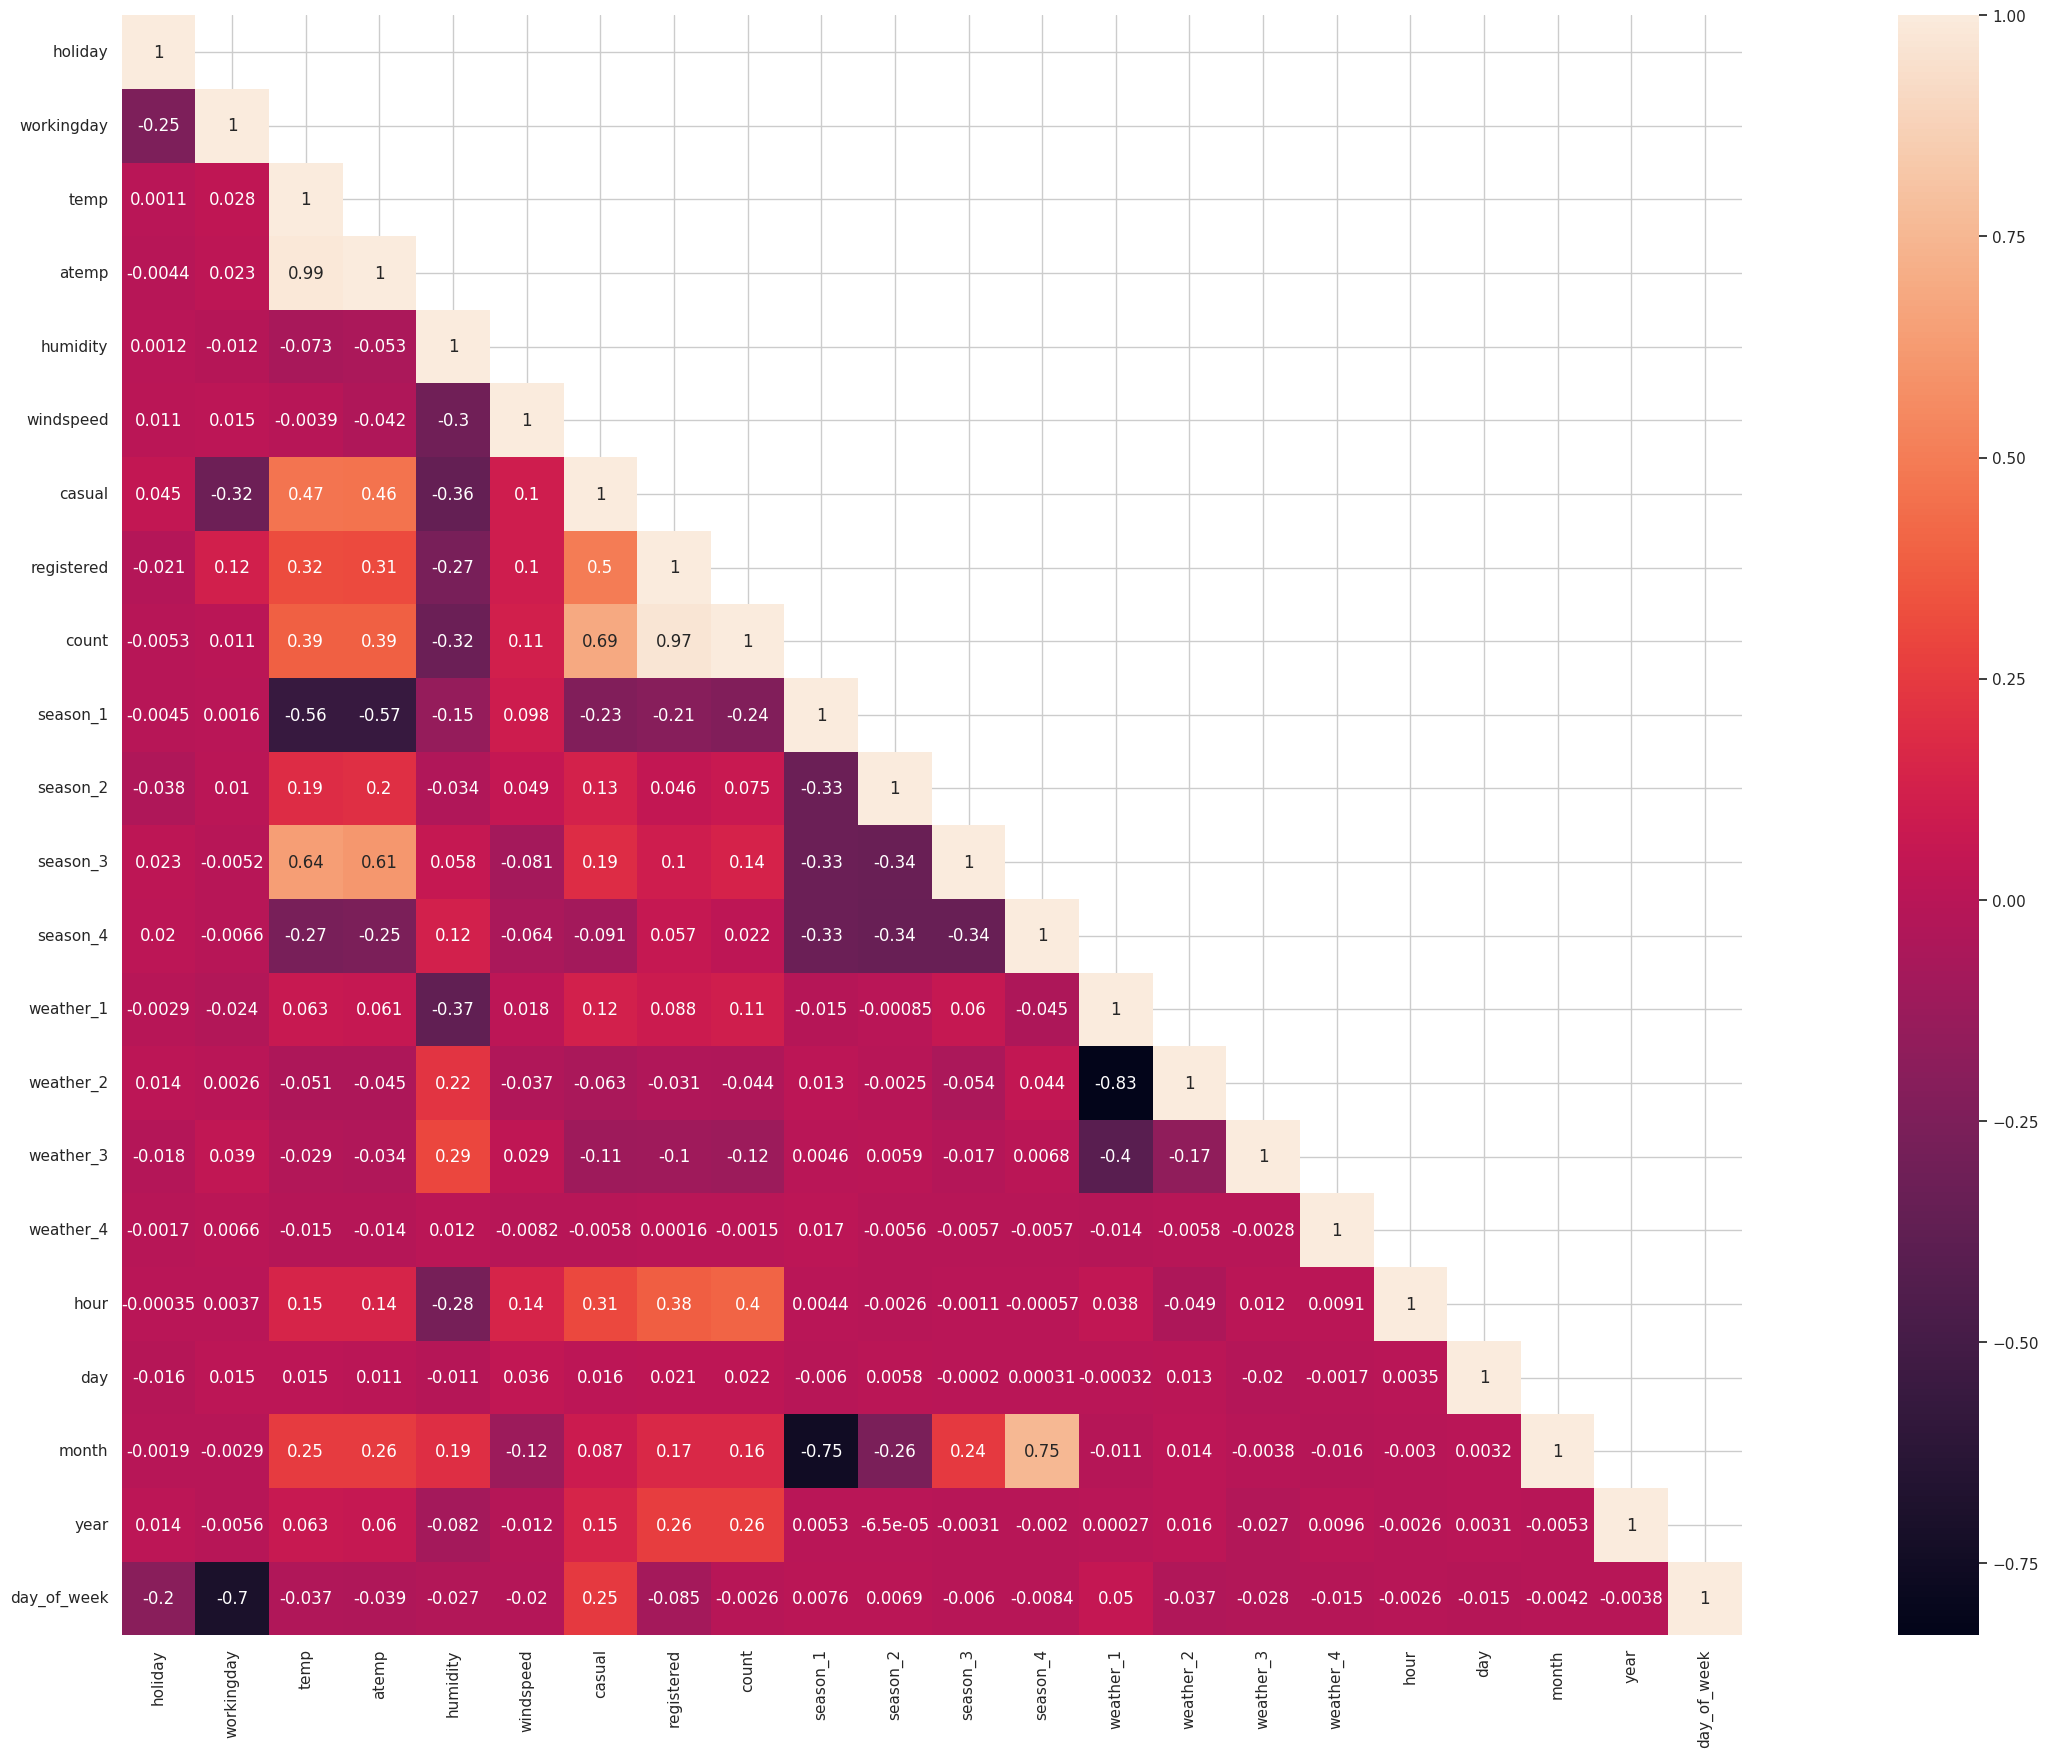

In [27]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(36,20)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

Inference from this heatmap is pretty much the same as the first one which is good.

We drop casual and registered as it is not available in the test dataset

In [28]:
df.drop(['casual','registered'],axis=1,inplace=True)
print(df.head())

   holiday  workingday  temp   atemp  humidity  windspeed  count  season_1  \
0        0           0  9.84  14.395        81        0.0     16      True   
1        0           0  9.02  13.635        80        0.0     40      True   
2        0           0  9.02  13.635        80        0.0     32      True   
3        0           0  9.84  14.395        75        0.0     13      True   
4        0           0  9.84  14.395        75        0.0      1      True   

   season_2  season_3  season_4  weather_1  weather_2  weather_3  weather_4  \
0     False     False     False       True      False      False      False   
1     False     False     False       True      False      False      False   
2     False     False     False       True      False      False      False   
3     False     False     False       True      False      False      False   
4     False     False     False       True      False      False      False   

   hour  day  month  year  day_of_week  
0     0    1   

Now let see how count varies with different features

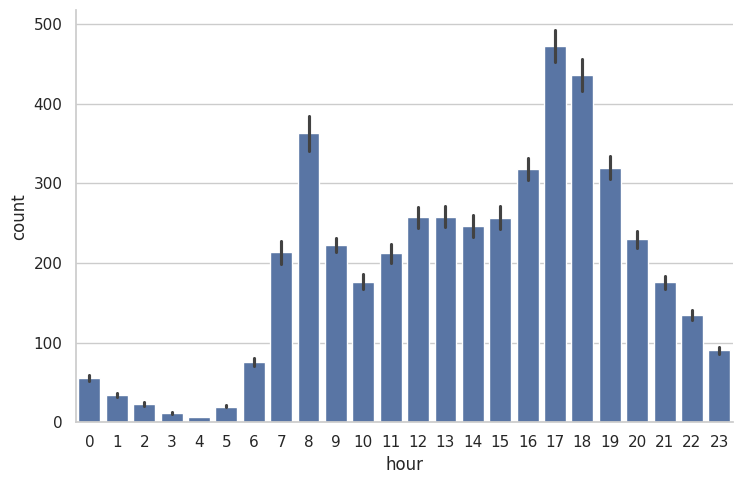

In [29]:
# with hour.
sns.catplot(x="hour",y="count",data=df,kind='bar',aspect=1.5)

the highest demand is in hours from say 7-10 and the from 15-19. this is bcoz in most of the metroploitan cities this is the peak office time and so more people would be renting bikes. this is just one of the plausible reason

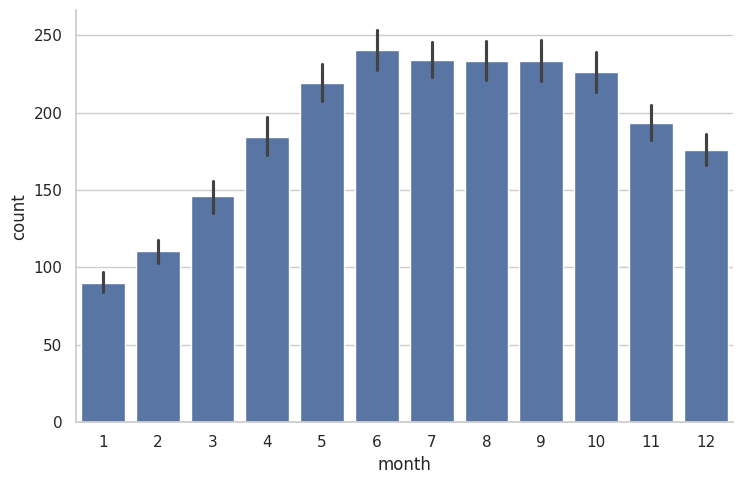

In [30]:
sns.catplot(x="month",y="count",data=df,kind='bar',aspect=1.5)
# note that month affects season and that affects weather people take bike or not. Just like climate conditions rainy,hazy etc... .

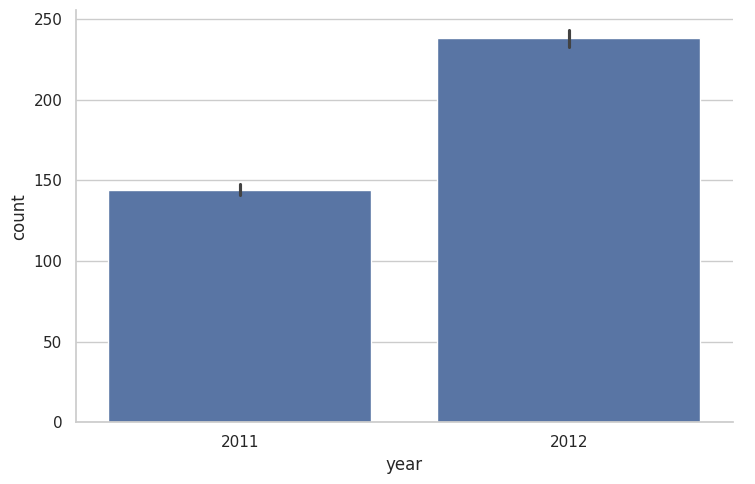

In [31]:
sns.catplot(x="year",y="count",data=df,kind='bar',aspect=1.5)

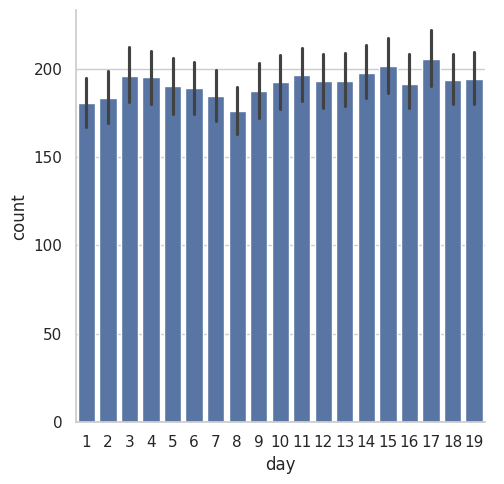

In [32]:
sns.catplot(x="day",y='count',kind='bar',data=df,aspect=1)

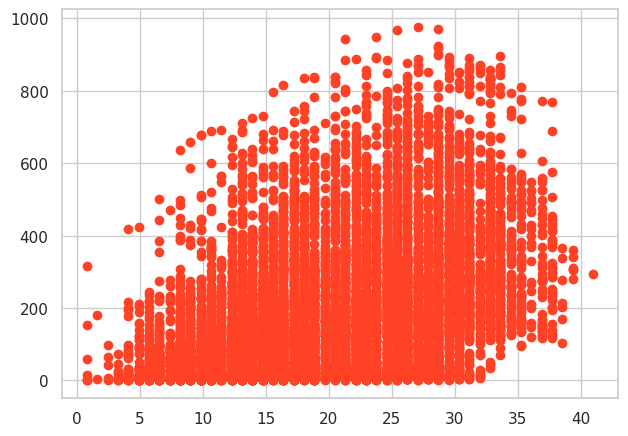

In [33]:
# for temp
plt.scatter(x="temp",y="count",data=df,color='#ff4125')

this way this is hard to visualze. a better way is to convert the 'temp' variable into intervals or so called bins and then treat it like a discrete variable

count    10659.000000
mean        20.268901
std          7.788440
min          0.820000
25%         13.940000
50%         20.500000
75%         26.240000
max         41.000000
Name: temp, dtype: float64


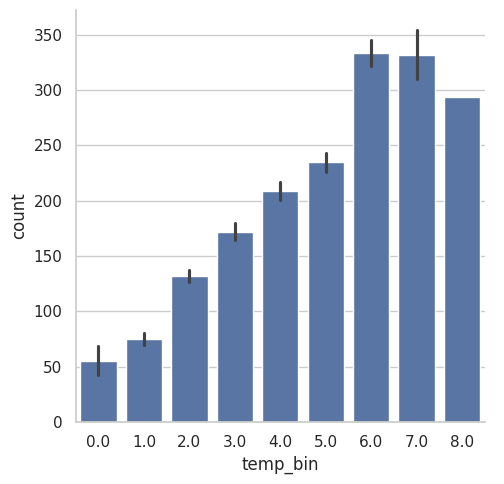

In [34]:
new_df=df.copy()
print(new_df.temp.describe())
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
# now we can visualize as follows
sns.catplot(x="temp_bin",y="count",data=new_df,kind='bar')

count    10659.000000
mean        23.713577
std          8.443245
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64


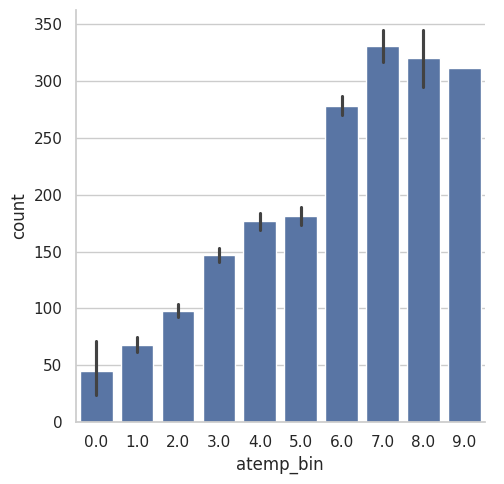

In [35]:
new_df=df.copy()
print(new_df.atemp.describe())
new_df['atemp_bin']=np.floor(new_df['atemp'])//5
new_df['atemp_bin'].unique()
# now we can visualize as follows
sns.catplot(x="atemp_bin",y="count",data=new_df,kind='bar')

 the demand is highest for bins 6 and 7 which is about tempearure 30-35(bin 6) and 35-40 (bin 7)

count    10659.000000
mean        62.214373
std         19.083557
min          0.000000
25%         47.000000
50%         62.000000
75%         78.000000
max        100.000000
Name: humidity, dtype: float64


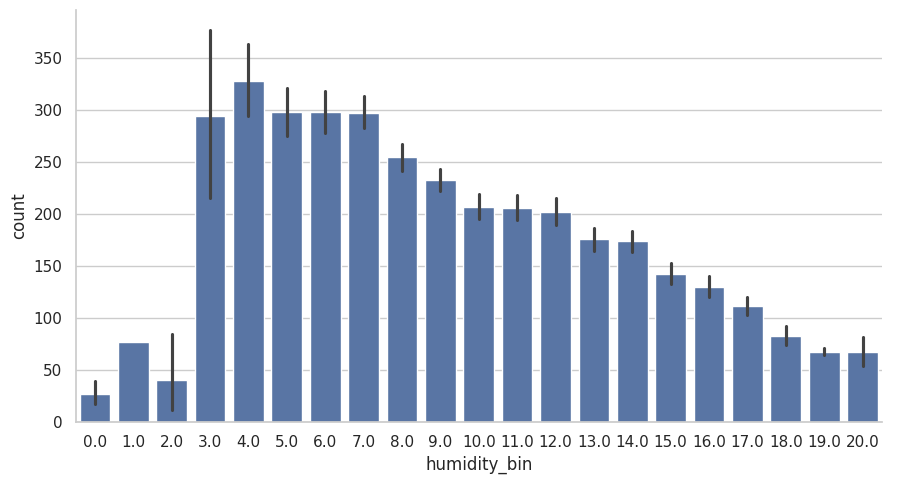

In [36]:
new_df=df.copy()
print(new_df.humidity.describe())
new_df['humidity_bin']=np.floor(new_df['humidity'])//5
new_df['humidity_bin'].unique()
# now we can visualize as follows
sns.catplot(x="humidity_bin",y="count",data=new_df,kind='bar', aspect = 1.8)

count    10659.000000
mean        12.292752
std          7.441015
min          0.000000
25%          7.001500
50%         11.001400
75%         16.997900
max         31.000900
Name: windspeed, dtype: float64


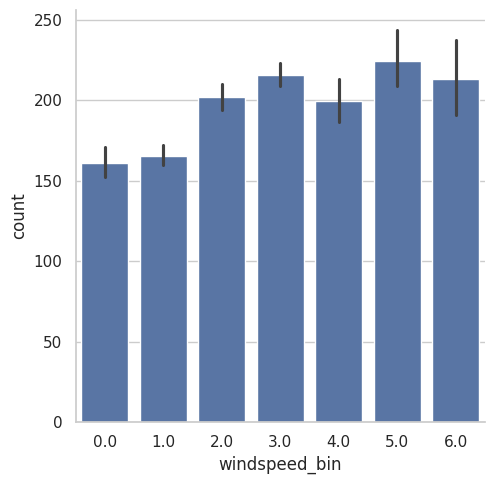

In [37]:
new_df=df.copy()
print(new_df.windspeed.describe())
new_df['windspeed_bin']=np.floor(new_df['windspeed'])//5
new_df['windspeed_bin'].unique()
# now we can visualize as follows
sns.catplot(x="windspeed_bin",y="count",data=new_df,kind='bar')

In [38]:
print(df.head())

   holiday  workingday  temp   atemp  humidity  windspeed  count  season_1  \
0        0           0  9.84  14.395        81        0.0     16      True   
1        0           0  9.02  13.635        80        0.0     40      True   
2        0           0  9.02  13.635        80        0.0     32      True   
3        0           0  9.84  14.395        75        0.0     13      True   
4        0           0  9.84  14.395        75        0.0      1      True   

   season_2  season_3  season_4  weather_1  weather_2  weather_3  weather_4  \
0     False     False     False       True      False      False      False   
1     False     False     False       True      False      False      False   
2     False     False     False       True      False      False      False   
3     False     False     False       True      False      False      False   
4     False     False     False       True      False      False      False   

   hour  day  month  year  day_of_week  
0     0    1   

## Model Building

In [39]:
df.columns.to_series().groupby(df.dtypes).groups

{bool: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int32: ['hour', 'day', 'month', 'year', 'day_of_week'], int64: ['holiday', 'workingday', 'humidity', 'count'], float64: ['temp', 'atemp', 'windspeed']}

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

I tried to use Linear Regression but for some reason it was giving negative values which is impossible for the case of count. That's why I removed it

In [41]:
models=[RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}

In [42]:
rmsle_frame=pd.DataFrame(d)
print(rmsle_frame)

          Modelling Algo     RMSLE
0  RandomForestRegressor  0.333550
1      AdaBoostRegressor  0.986098
2                    SVR  1.444555
3    KNeighborsRegressor  0.933755


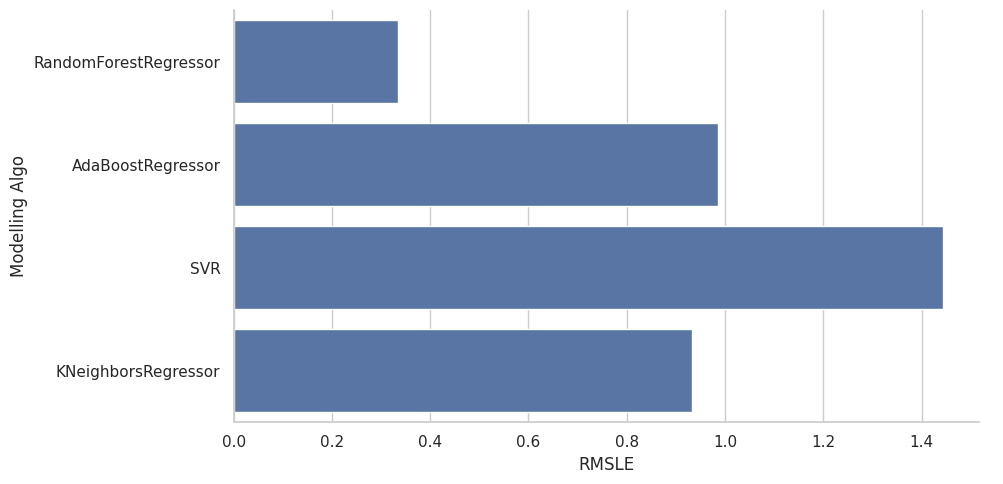

In [43]:
sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',aspect=2)

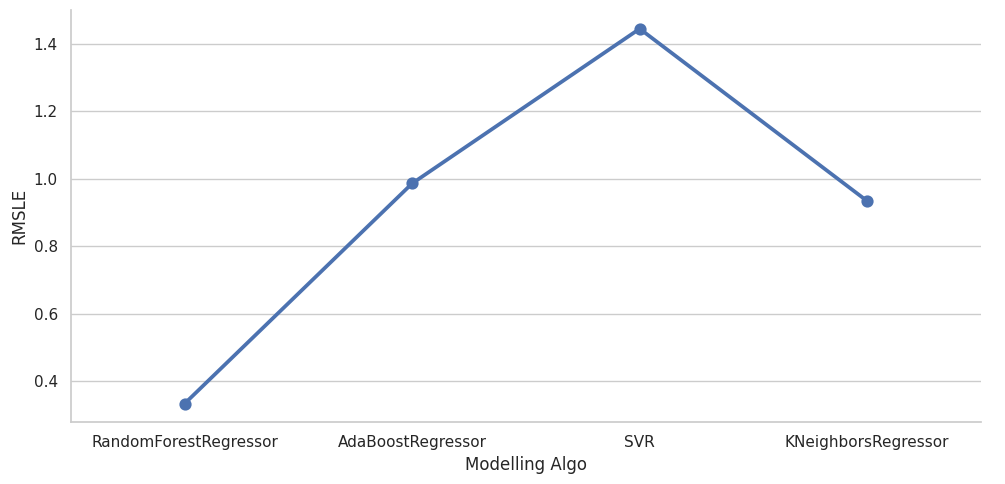

In [44]:
sns.catplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',aspect=2)

The best model from this Random Forest Regression(lower RMSLE is better).

As models like SVR and K-Neighbour Regression worked better with scaled data I scaled the data to check the results.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
models=[KNeighborsRegressor()]
model_names=['KNeighborsRegressorSc']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train_scaled,y_train)
    test_pred=clf.predict(x_test_scaled)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d_scale={'Modelling Algo':model_names,'RMSLE':rmsle}
rmsle_frame_scaled=pd.DataFrame(d_scale)
rmsle_frame_scaled

,Modelling Algo,RMSLE
0,KNeighborsRegressorSc,1.017902


I tried using scaled data on all the models but all except this gave negative values

In [47]:
frames = [rmsle_frame,rmsle_frame_scaled]
result = pd.concat(frames)
result

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.333550
1,AdaBoostRegressor,0.986098
2,SVR,1.444555
3,KNeighborsRegressor,0.933755
0,KNeighborsRegressorSc,1.017902


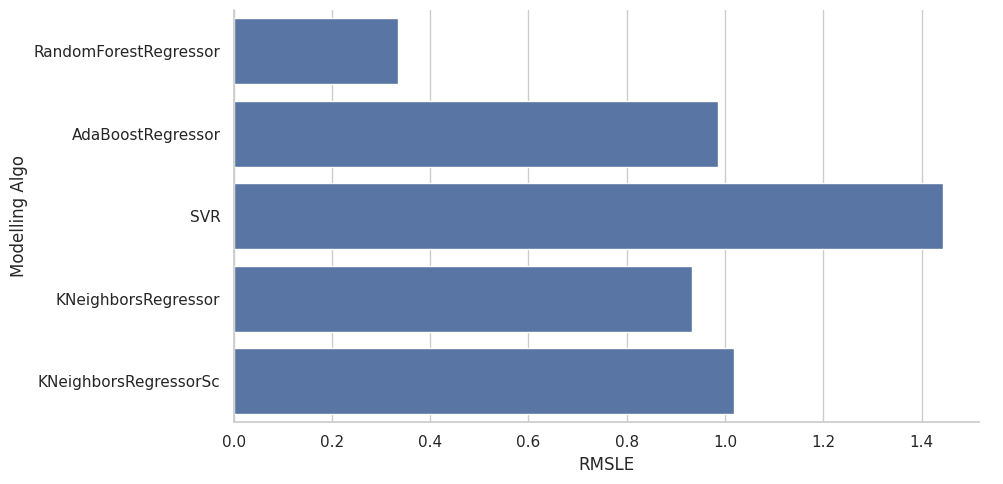

In [48]:
sns.catplot(y='Modelling Algo',x='RMSLE',data=result,kind='bar',aspect=2)

As we can see Random Forest Regression I still clearly performing better

## Model Parmeter Tuning

As Random Forest Regressor was the best I tried tuning the model to get better results

In [49]:

# Assuming x_train, x_test, y_train, y_test are already defined

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base model
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_log_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best found model to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE with tuned RandomForestRegressor: {rmsle}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSLE with tuned RandomForestRegressor: 0.331888406661439


I still wanted to see if K-Neighbours could work so I tuned the model as well to see if I could get better results but it was still significantly worse.

In [50]:
# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50]
}

# Create a base KNN model
knn = KNeighborsRegressor()

# Instantiate the grid search model
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_param_grid,
                               cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_log_error')

# Fit the grid search to the data
knn_grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best parameters found for KNN: ", knn_grid_search.best_params_)

# Use the best found model to make predictions
best_knn = knn_grid_search.best_estimator_
y_pred_knn = best_knn.predict(x_test)

# Calculate RMSLE
rmsle_knn = np.sqrt(mean_squared_log_error(y_test, y_pred_knn))
print(f"RMSLE with tuned KNeighborsRegressor: {rmsle_knn}")

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters found for KNN:  {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
RMSLE with tuned KNeighborsRegressor: 0.87543874295925


## Testing with real data

As Random Forest was the best model I chose it as my final model and tested it on the live data.

In [51]:
pred=best_rf.predict(test_df.drop('datetime',axis=1))
d={'datetime':test_df['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('/content/submission.csv',index=False)

In [52]:
print(ans)

                datetime       count
0    2011-01-20 00:00:00   12.166667
1    2011-01-20 01:00:00    7.253333
2    2011-01-20 02:00:00    5.360000
3    2011-01-20 03:00:00    3.930000
4    2011-01-20 04:00:00    3.243333
...                  ...         ...
6488 2012-12-31 19:00:00  291.730000
6489 2012-12-31 20:00:00  207.076667
6490 2012-12-31 21:00:00  155.413333
6491 2012-12-31 22:00:00  111.780000
6492 2012-12-31 23:00:00   64.226667

[6493 rows x 2 columns]
